<a href="https://colab.research.google.com/github/TKph/colab/blob/main/%E3%82%AC%E3%82%A6%E3%82%B9%E6%B7%B7%E5%90%88%E3%83%A2%E3%83%87%E3%83%AB%E3%81%AB%E3%82%88%E3%82%8B%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E3%83%AA%E3%83%B3%E3%82%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



---
# データの生成


---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
plt.style.use('seaborn-darkgrid')

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

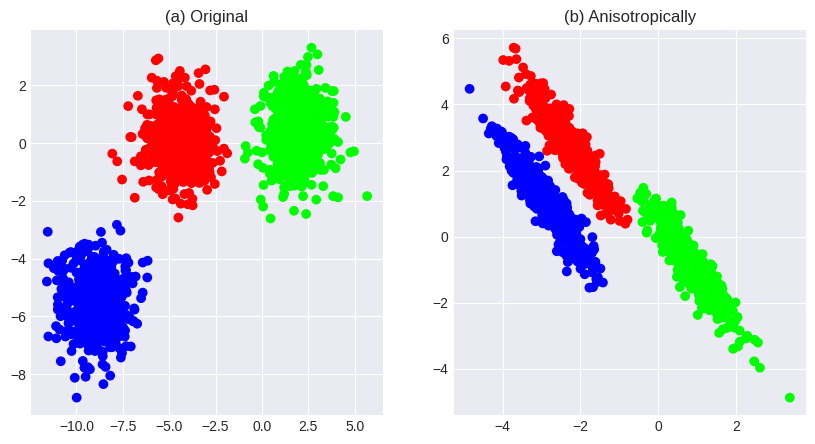

In [3]:
X, y = make_blobs(n_samples=1500, centers=3, random_state=170)

#変換行列??
transformation = [[0.5, -0.6], [-0.3, 0.8]]
X_aniso = np.dot(X, transformation)

#可視化
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.title("(a) Original")
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='brg')
plt.subplot(122)
plt.title("(b) Anisotropically")
plt.scatter(X_aniso[:, 0], X_aniso[:, 1], c=y, cmap='brg')



---

# ガウス混合モデルの適用

---



/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


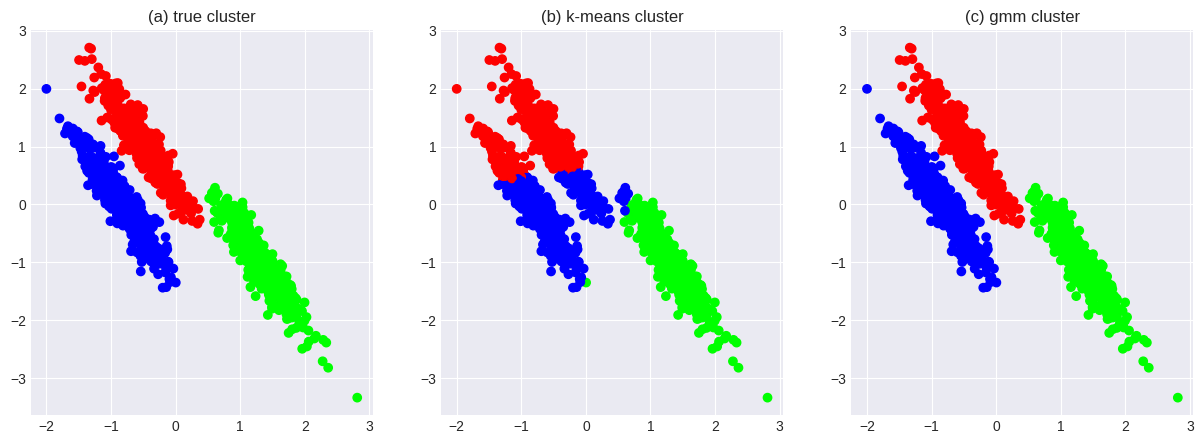

In [5]:
#標準化
X_norm = StandardScaler().fit_transform(X_aniso)

#k-means
kmeans = KMeans(n_clusters=3, random_state=5)

kmeans.fit(X_norm)
kmeans_y_pred = kmeans.predict(X_norm)

#GMM
gmm = GaussianMixture(n_components=3, random_state=5)
gmm.fit(X_norm)
gmm_y_pred = gmm.predict(X_norm)

#可視化
plt.figure(figsize=(15,5))
plt.subplot(131)
plt.title("(a) true cluster")
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=y, cmap='brg')
plt.subplot(132)
plt.title("(b) k-means cluster")
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=kmeans_y_pred, cmap='brg')
plt.subplot(133)
plt.title("(c) gmm cluster")
plt.scatter(X_norm[:, 0], X_norm[:, 1], c=gmm_y_pred, cmap='brg')

In [7]:
#予測
new_data = [[-0.5, 0.3]]
probs = gmm.predict_proba(new_data)[0]

for idx, prob in enumerate(probs):
  print(f'cluster{idx} probability:{prob:.3f}')

cluster0 probability:0.269
cluster1 probability:0.731
cluster2 probability:0.000
